In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = yf.download('SPY', start='1990-01-01', end='2019-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.627346,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.809631,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.864300,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.137711,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.247072,531500


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,321.589996,321.649994,321.059998,321.220001,311.183228,52990000
2019-12-24,321.470001,321.519989,320.899994,321.230011,311.192963,20270000
2019-12-26,321.649994,322.950012,321.640015,322.940002,312.849518,30911200
2019-12-27,323.739990,323.799988,322.279999,322.859985,312.772003,42528800
2019-12-30,322.950012,323.100006,320.549988,321.079987,311.047577,49729100


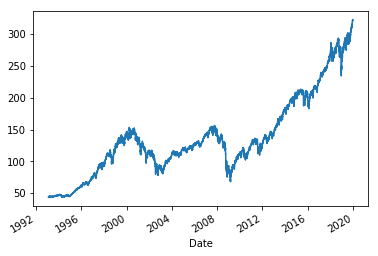

In [4]:
df.Close.plot()

In [12]:
df = df.reset_index().rename(columns = {'index' : 'Date'})
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.627346,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.809631,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.864300,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.137711,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.247072,531500


In [15]:
df.index = df.Date
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1993-01-29,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.627346,1003200
1993-02-01,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.809631,480500
1993-02-02,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.864300,201300
1993-02-03,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.137711,529400
1993-02-04,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.247072,531500


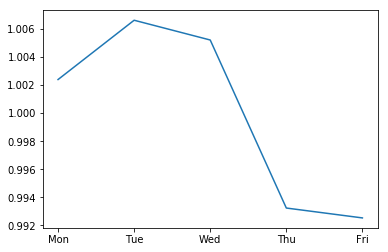

In [18]:
## 서로 다른 연도에서 한 주씩 총 3개를 선택
## 각 주의 평균 종가로 각 날의 종가를 조정
## 1993년
vals = df['1993-05-10' : '1993-05-14'].Close.values
mean_val = np.mean(vals)
plt.plot([1, 2, 3, 4, 5], vals/mean_val)
plt.xticks([1, 2, 3, 4, 5], labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.show()

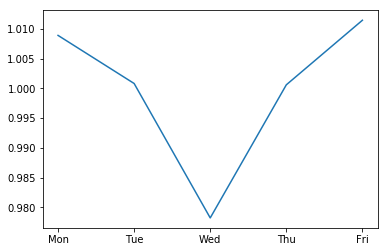

In [20]:
## 2000년
vals = df['2000-05-08' : '2000-05-12'].Close.values
mean_val = np.mean(vals)
plt.plot([1, 2, 3, 4, 5], vals/mean_val)
plt.xticks([1, 2, 3, 4, 5], labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.show()

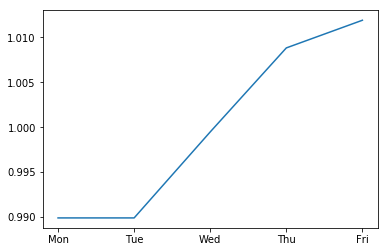

In [21]:
## 2018년
vals = df['2018-05-07' : '2018-05-11'].Close.values
mean_val = np.mean(vals)
plt.plot([1, 2, 3, 4, 5], vals/mean_val)
plt.xticks([1, 2, 3, 4, 5], labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.show()

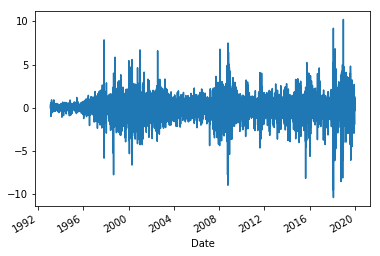

In [22]:
df['Return'] = df.Close - df.Open
df.Return.plot()

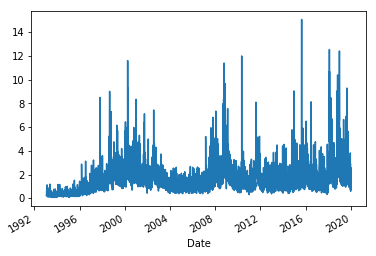

In [24]:
df['DailyVolatility'] = df.High - df.Low
df.DailyVolatility.plot()

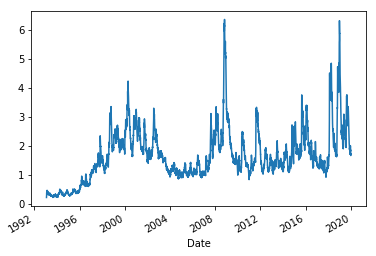

In [25]:
ewdf = df.ewm(halflife= 10).mean()
ewdf.DailyVolatility.plot()